In [ ]:
    def set_flow_algorithm(self, flag='DE0'):
        """Set combination of slope limiting and time stepping

        Currently
           1
           1.5
           2
           2.5
           tsunami
           DE0
           DE1
           DE2
           DE0_7
           DE1_7
        """

        """
            ...
        """



        if self.flow_algorithm == '1_0':
            self._set_1_0_defaults()

        if self.flow_algorithm == '1_5':
            self._set_1_5_defaults()

        if self.flow_algorithm == '1_75':
            self._set_1_75_defaults()

        if self.flow_algorithm == '2_0_limited':
            self._set_2_0_limited_defaults()


        if self.flow_algorithm == '2_0':
            self._set_2_0_defaults()


        if self.flow_algorithm == '2_5':
            self._set_2_5_defaults()


        if self.flow_algorithm == 'tsunami':
            self._set_tsunami_defaults()


        if self.flow_algorithm == 'yusuke':
            # To speed up calculation we also turn off
            # the update of other quantities

            self._set_tsunami_defaults()




        if self.flow_algorithm == 'DE0':
            self._set_DE0_defaults()

        if self.flow_algorithm == 'DE1':
            self._set_DE1_defaults()

        if self.flow_algorithm == 'DE2':
            self._set_DE2_defaults()

        if self.flow_algorithm == 'DE0_7':
            self._set_DE0_7_defaults()

        if self.flow_algorithm == 'DE1_7':
            self._set_DE1_7_defaults()

Descripciones:

```
    def _set_1_0_defaults(self):
        """Set up the defaults for running the flow_algorithm "1_0"
           so that users can revert back to old default algorithm
        """
        
    def _set_1_5_defaults(self):
        """Set up the defaults for running the flow_algorithm "1_5"
           so that users can revert back to old default algorithm
        """
        
    def _set_1_75_defaults(self):
        """Set up the defaults for running the flow_algorithm "1_75"
           so that users can revert back to old default algorithm
        """
        
    def _set_2_0_limited_defaults(self):
        """Set up the defaults for running the flow_algorithm "2_limited"
           so that users can revert back to old default algorithm
        """
        
    def _set_2_0_defaults(self):
        """Set up the defaults for running the flow_algorithm "2_0"
           so that users can revert back to old default algorithm
        """
        
    def _set_2_5_defaults(self):
        """Set up the defaults for running the flow_algorithm "2_0"
           so that users can revert back to old default algorithm
        """
        
    def _set_DE0_defaults(self):
        """Set up the defaults for running the flow_algorithm "DE0"
           A 'discontinuous elevation' method
        """
    def _set_DE1_defaults(self):
        """Set up the defaults for running the flow_algorithm "DE1"
           A 'discontinuous elevation' method
        """        
```

In [24]:
domain.set_timestepping_method?

In [25]:
domain.set_compute_fluxes_method?

# ANUGA - Channel1.py example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

%matplotlib inline
import anuga

## Setup the simulation

Computational domain

In [2]:
k = 2
domain = anuga.rectangular_cross_domain(10*k, 5*k, len1=10.0, len2=5.0)
domain.set_name('channel1')

Initial condition

In [3]:
def topography(x, y):
    return -x/10                             # linear bed slope

domain.set_quantity('elevation', topography) # Use function for elevation
domain.set_quantity('friction', 0.01)        # Constant friction 
domain.set_quantity('stage',                 # Dry bed
                    expression='elevation')  

Boundary conditions

In [4]:
Bi = anuga.Dirichlet_boundary([0.4, 0, 0])         # Inflow
Br = anuga.Reflective_boundary(domain)             # Solid reflective wall

domain.set_boundary({'left': Bi, 'right': Br, 'top': Br, 'bottom': Br})

## Evolve the simulation

In [26]:
domain.set_flow_algorithm('DE2')
# domain.set_minimum_allowed_height(0.01)


In [27]:
for t in domain.evolve(yieldstep=0.2, finaltime=40.0):
    domain.print_timestepping_statistics()

## Process the results

Read all frames from the .sww file at once

In [28]:
out = anuga.utilities.plot_utils.get_output('channel1.sww') #vertex values
outc =  anuga.utilities.plot_utils.get_centroids(out) #centroid values

Obtain a profile view of the water at $y=2.5m$

In [29]:
tr = anuga.utilities.plot_utils.near_transect(out,[0,2.5],[10.0,2.5])

Sort values in ascending $x$ order.

In [30]:
tr = list(tr)
sorting = np.argsort(tr[1])
tr[1] = tr[1][sorting]
tr[0] = tr[0][sorting]

Check how the transect looks like

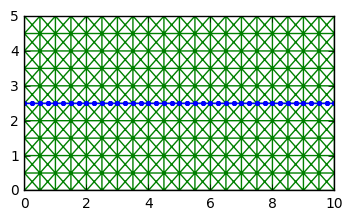

In [31]:
triang = tri.Triangulation(out.x,out.y,out.vols)
plt.figure(figsize=(4,2.25))
plt.plot(tr[1],np.ones_like(tr[1])*2.5,'.-')
plt.triplot(triang)

Animate these results


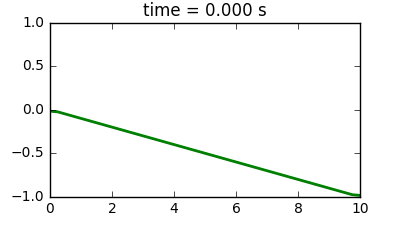
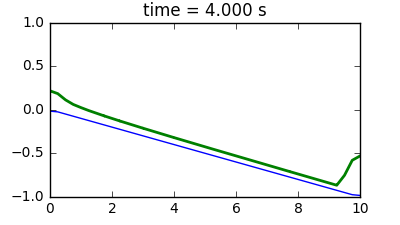
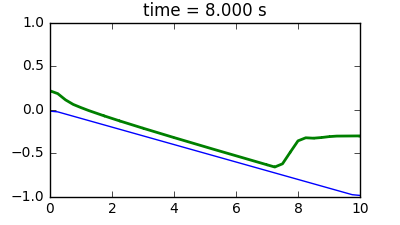
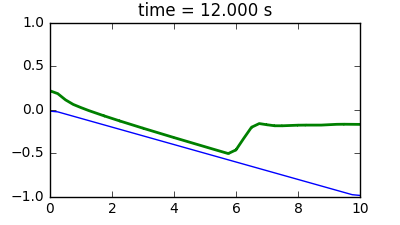
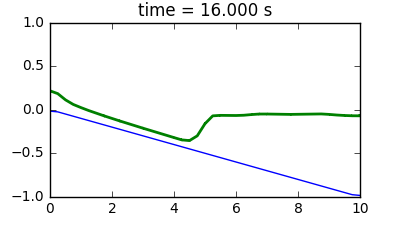
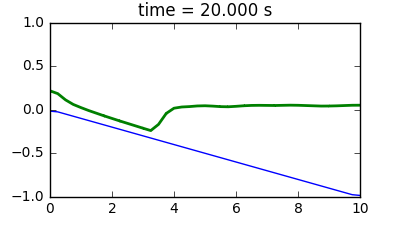
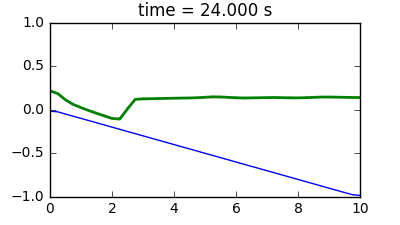
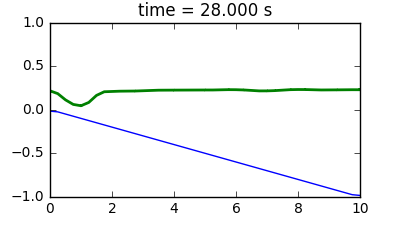
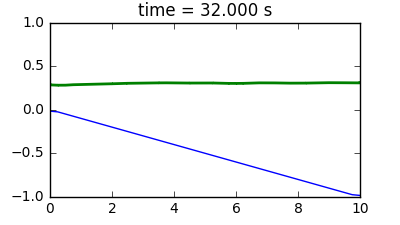
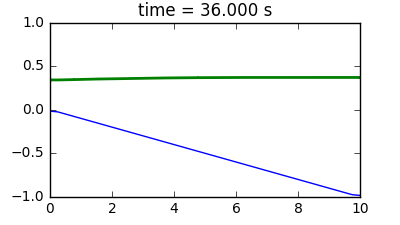

In [32]:
from JSAnimation import IPython_display
from matplotlib import animation


fig = plt.figure(figsize=(4,2.25))
ax = plt.subplot(111)
ax.plot(tr[1], out.elev[tr[0]])
line, = ax.plot([], [], lw=2)
ttl = ax.set_title('time = 0.0 s')
ax.set_ylim(-1,1)
def animate(i):
    line.set_data(tr[1],out.stage[i*int(out.stage.shape[0]/10.),tr[0]])
    ttl.set_text('time = %.3f s'%out.time[i*int(out.stage.shape[0]/10.)])
    
    return line,

animation.FuncAnimation(fig, animate, frames=10, interval=200, blit=True)

## Check min height on results

In [23]:
np.where(out.height>0)

(array([  1,   1,   1, ..., 200, 200, 200]),
 array([  0,   1,   2, ..., 428, 429, 430]))

In [15]:
out.height[np.where(out.height>0)].min()

0.0012090504

In [16]:
out.height[np.where(out.height[:,tr[0]]>0)].min()

0.042009413